In [1]:
from matplotlib import pyplot as plt

In [1]:
import torch
import unittest
from pprint import pprint
from dataclasses import asdict

from mutual_information.data.dataloader_utils import load_dataloader
from mutual_information.models.models_utils import load_binary_classifier
from mutual_information.trainers.trainers_utils import load_experiments_configuration

from mutual_information.models.mutual_information import MutualInformationEstimator
from mutual_information.trainers.mi_trainer import MutualInformationTrainer

from mutual_information.configs.mi_config import get_config_from_file
from mutual_information.trainers.mi_trainer_config import MITrainerConfig
from mutual_information.models.binary_classifier_config import BaseBinaryClassifierConfig
from mutual_information.configs.mi_config import MutualInformationConfig
from mutual_information.data.dataloaders import ContrastiveMultivariateGaussianLoaderConfig

In [2]:
dimensions_per_variable = 2
number_of_variables = 2
batch_size = 32
experiment_indentifier = "mi_2d"

config = MutualInformationConfig(experiment_name='mi',
                                 experiment_type='multivariate_gaussian',
                                 experiment_indentifier=experiment_indentifier,
                                 delete=True)
config.dataloader = ContrastiveMultivariateGaussianLoaderConfig(dimensions_per_variable=dimensions_per_variable,
                                                                number_of_variables=number_of_variables,
                                                                sample_size=1000,
                                                                batch_size=batch_size,
                                                                data_set=experiment_indentifier,
                                                                delete_data=False)
config.binary_classifier = BaseBinaryClassifierConfig(hidden_size=100)
config.trainer = MITrainerConfig(number_of_epochs=500,
                                 save_model_epochs=100)

In [4]:
# CHECK DATA

In [5]:
dataloader = load_dataloader(config)
databatch = next(dataloader.train().__iter__())

In [17]:
X_JOIN = []
X_INDEPENDENT = []
for databatch in dataloader.train():
    x_join = databatch["join"]
    x_independent = databatch["independent"]
    X_JOIN.append(x_join)
    X_INDEPENDENT.append(x_independent)
X_JOIN = torch.vstack(X_JOIN)
X_INDEPENDENT = torch.vstack(X_INDEPENDENT)

In [18]:
X_INDEPENDENT.shape

torch.Size([800, 4])

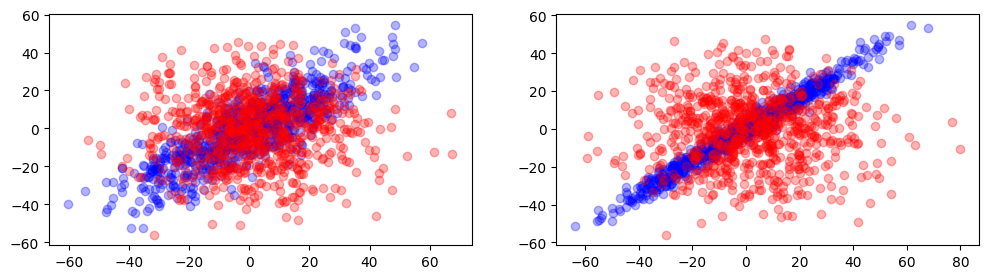

In [24]:
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(12,3))
ax[0].plot(X_JOIN[:,0],X_JOIN[:,2],"bo",alpha=0.3)
ax[0].plot(X_INDEPENDENT[:,0],X_INDEPENDENT[:,2],"ro",alpha=0.3)
ax[1].plot(X_JOIN[:,1],X_JOIN[:,3],"bo",alpha=0.3)
ax[1].plot(X_INDEPENDENT[:,1],X_INDEPENDENT[:,3],"ro",alpha=0.3)

In [25]:
MIT = MutualInformationTrainer(config)
MIT.train()

Epoch: 1, Loss: 1.3414045882225036
Epoch: 11, Loss: 0.5256378126144409
Epoch: 21, Loss: 0.46165927648544314
Epoch: 31, Loss: 0.43358654260635376
Epoch: 41, Loss: 0.4166496604681015
Epoch: 51, Loss: 0.40459223866462707
Epoch: 61, Loss: 0.3957656502723694
Epoch: 71, Loss: 0.38916352748870847
Epoch: 81, Loss: 0.3836756992340088
Epoch: 91, Loss: 0.37956669211387634
Epoch: 101, Loss: 0.37652353644371034
Epoch: 111, Loss: 0.3738980257511139
Epoch: 121, Loss: 0.3716555249691009
Epoch: 131, Loss: 0.3695871275663376
Epoch: 141, Loss: 0.36764223098754883
Epoch: 151, Loss: 0.3655726623535156
Epoch: 161, Loss: 0.36424458146095273
Epoch: 171, Loss: 0.3625474053621292
Epoch: 181, Loss: 0.3610815131664276
Epoch: 191, Loss: 0.3595704412460327
Epoch: 201, Loss: 0.3583402442932129
Epoch: 211, Loss: 0.3575717383623123
Epoch: 221, Loss: 0.35620811343193054
Epoch: 231, Loss: 0.35510629892349244
Epoch: 241, Loss: 0.35371384024620056
Epoch: 251, Loss: 0.3526493513584137
Epoch: 261, Loss: 0.3516650578379631
E

In [3]:
MIE = MutualInformationEstimator()
MIE.load_results_from_directory(experiment_name='mi',
                                experiment_type='multivariate_gaussian',
                                experiment_indentifier=experiment_indentifier,
                                checkpoint=0)

In [4]:
databath = next(MIE.dataloader.train().__iter__())
x_join = databath["join"]
x_independent = databath["independent"]
p_join = MIE.binary_classifier(x_join)
p_independent = MIE.binary_classifier(x_independent)

print("p join: {0} p independent: {1}".format(p_join.mean(),p_independent.mean()))

p join: 0.8263176083564758 p independent: 0.8467461466789246


In [5]:
MIE.MI_Estimate()

(tensor(-9.4934, grad_fn=<SumBackward0>),
 tensor(-0.0119, grad_fn=<DivBackward0>))

In [6]:
MIE.dataloader.mutual_information()

tensor(2.4721)